<a href="https://colab.research.google.com/github/mandar-solanki/ML_Regression_Methods_Exercise/blob/main/0721_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Pandas and scikit-learn lib Predict scores of student on basis of study hours

In [1]:
## Importing required libariries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**% Matplotlib : With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it**

In [2]:
d=pd.read_excel("/content/Salary.xlsx")
d.head(3)
d.shape


(86, 2)

In [3]:
d.describe()
#d.shape
## Scores = m(s.h)+c


,YearsExperience,Salary
count,86.000000,86.000000
mean,17.096124,104790.116279
std,10.623181,57680.123097
min,1.100000,10000.000000
25%,7.300000,65485.500000
50%,16.658333,106694.000000
75%,26.220833,153274.000000
max,35.783333,199854.000000


In [4]:
d.isnull().sum()


,0
YearsExperience,0
Salary,0


## Visualizing  fields

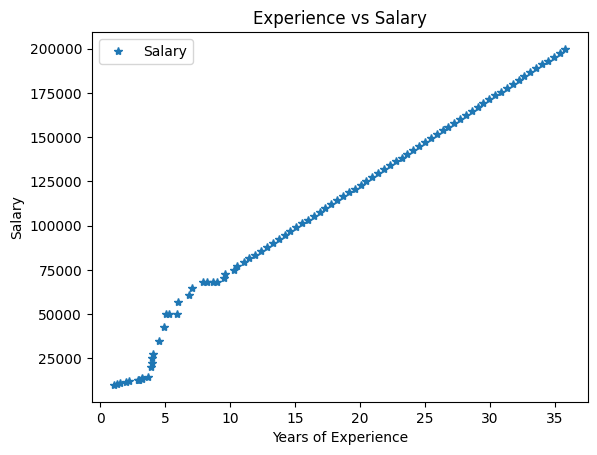

In [7]:
d.plot(x='YearsExperience', y='Salary', style='*')
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


- Test and Train (Checking for validation: every property of all data,)
- Train 80%,75%,70% , Test= 20%, 25%,30%

##  Correlation coefficient
Is a measure of the association between two variables. It is used to find the relationship is between data and a measure to check how strong it is. The formulas return a value between -1 and 1 wherein one shows -1 shows negative correlation and +1 shows a positive correlation



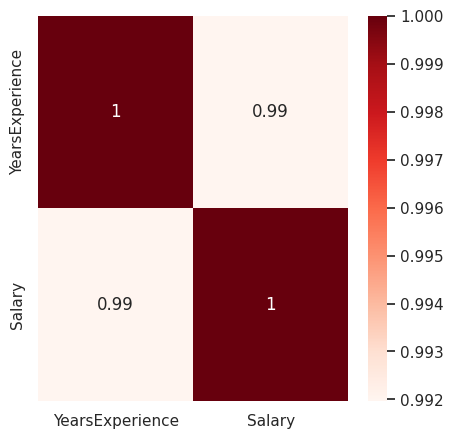

In [8]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(5,5))
cor = d.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [9]:
X = d.iloc[:, :-1].values  ## Feature
y = d.iloc[:, 1].values    ## Target


## Scikit-Learn's built-in train_test_split() method:

### How to split:

Make sure that your test set meets the following two conditions:

- Is large enough to yield statistically meaningful results.

- Is representative of the data set as a whole.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

 #### Lets see how linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.

In [12]:
print(reg.intercept_)  ## Value of Y when X=0

13330.391275873102


In [13]:
print(reg.coef_)

[5353.56946714]


Salary= b0+b1(YE)

Salary = 13330+5354(YE)


### Insight
-  This means that for every one year of experience, the change in the salary is about 5354

In [14]:
y_pred = reg.predict(X_test)
y_pred
##The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.


array([ 21360.74547658,  35280.02609114, 127807.55171486,  98898.27659231,
       178398.78317932,  72398.10772997, 108534.70163316, 103716.48911273,
       137443.97675571, 204898.95204166,  30461.81357072,  64189.30121369,
        79625.42651061, 149489.50805677,  30461.81357072,  40633.59555828,
        59906.44563998, 135034.8704955 ])

## To compare the actual output values for X_test with the predicted values

In [15]:
r = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
r


,Actual,Predicted
0,11000,21360.745477
1,27500,35280.026091
2,129710,127807.551715
3,103406,98898.276592
4,175742,178398.783179
5,79294,72398.107730
6,112174,108534.701633
7,107790,103716.489113
8,138478,137443.976756
9,199854,204898.952042


- R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression.


In [16]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.9796911035457284


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  #average of absolute errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 6277.6055016728615
Mean Squared Error: 61163741.465803474
Root Mean Squared Error: 7820.725124040831


## Performance Improvement by Cross validation
In this approach, we reserve 50% of the dataset for validation and the remaining 50% for model training. However, a major disadvantage of this approach is that since we are training a model on only 50% of the dataset, there is a huge possibility that we might miss out on some interesting information about the data which will lead to a higher bias

In [18]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(d, test_size=0.50, random_state = 5)


In [19]:
X_train, X_v, y_train, y_v = train_test_split(X, y, test_size=0.5, random_state=5)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [20]:
print(reg.intercept_,reg.coef_)


10132.005633944806 [5449.42684019]


In [21]:
y_pred = reg.predict(X_v)
y_pred


array([170799.27363898,  31384.7703107 ,  66261.10208794, 168347.03156089,
        57542.01914363,  82518.55882785,  54817.30572353,  53182.47767147,
        75161.83259358, 116849.94792106, 102136.49545254,  47188.10814726,
        39013.96788697,  31929.71299472, 136467.88454576, 195321.69441985,
       129111.1583115 ,  99684.25337445,  32474.65567874, 114397.70584298,
       141372.36870193,  61901.56061578, 180608.24195132,  26480.28615452,
       160990.30532663,  77614.07467167, 134015.64246767, 107040.97960871,
        48822.93619932,  59176.84719568,  94779.76921828,  67350.98745597,
        80066.31674976, 143824.61078002, 119302.18999915,  87423.04298402,
       153633.57909237,  21030.85931433,  31929.71299472, 165894.7894828 ,
       178155.99987324, 185512.7261075 , 151181.33701428])

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_v, y_pred)
print(r2)


0.9767405216392512


In [23]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_v, y_pred)))


Root Mean Squared Error: 7688.235744892171


## Model Correction
One commonly used method for doing this is known as k-fold cross-validation , which uses the following approach:
- Randomly divide a dataset into k groups, or “folds”, of roughly equal size.
- Choose one of the folds to be the holdout set.
- Fit the model on the remaining k-1 folds

In [24]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=4)
scores


array([0.97896787, 0.98833896, 0.98704216, 0.98223224])

In [25]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, cv=4)
scores


array([0.97896787, 0.98833896, 0.98704216, 0.98223224])